In [1]:
from IPython.display import IFrame

In [2]:

# import Logistic Regression and instantiate from sklearn
from sklearn.linear_model import LogisticRegression

from sklearn import metrics, linear_model
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# import dataset load_iris function from datasets module
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.datasets import load_wine
wine = load_wine()
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Logisitic regression 

In [21]:

def gridSearch(dataSet):
    X = dataSet.data
    y = dataSet.target
    
    logreg = LogisticRegression(multi_class='ovr', solver='liblinear')
    
    penalty = ['l1', 'l2']

    Csearch = range(1, 100, 5)
    gridSearchHyperParams = dict(C=Csearch, penalty=penalty)
    gridSearchParams = GridSearchCV(logreg, gridSearchHyperParams, cv=3, verbose=1, return_train_score=True)
    best_model_Search = gridSearchParams.fit(X,y)
    
    print('Best Penalty w/ grid search:', best_model_Search.best_estimator_.get_params()['penalty'])
    print('Best C w/ grid search:', best_model_Search.best_estimator_.get_params()['C'])
    
    y_pred = best_model_Search.predict(X)
    print(metrics.accuracy_score(y, y_pred))

    
    return gridSearchParams
    

In [24]:
def randSearch(dataSet):
    X = dataSet.data
    y = dataSet.target
    
    logreg = LogisticRegression(multi_class='ovr', solver='liblinear')
    
    penalty = ['l1', 'l2']
    C = uniform(loc=0, scale=4)
    
    randomSearchHyperparameters = dict(C=C, penalty=penalty)

    randomSearchParams = RandomizedSearchCV(logreg, randomSearchHyperparameters, random_state=1,iid=True, cv=3, verbose=100,n_iter=50)
    best_model_rand = randomSearchParams.fit(X, y)
    print('Best Penalty w/ random search:', best_model_rand.best_estimator_.get_params()['penalty'])
    print('Best C w/ random search:', best_model_rand.best_estimator_.get_params()['C'])
    
    y_pred = best_model_rand.predict(X)
    print(metrics.accuracy_score(y, y_pred))
    
    return randomSearchParams




In [ ]:
def baysieanSearch( ):
    

In [25]:
def graphToCompare(gridSearchParams, randomSearchParams):
    
    y_gridSearch = np.maximum.accumulate(gridSearchParams.cv_results_['mean_test_score'])
    y_randomSearch = np.maximum.accumulate(randomSearchParams.cv_results_['mean_test_score'])
    plt.plot(y_gridSearch, 'ro-', label='Grid search')
    plt.plot(y_randomSearch, 'bo-', label='Random search')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Search Comparison');
    plt.legend();
    

In [26]:
gsp = gridSearch(iris)
rsp = randSearch(iris)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/patrickward/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/patrickward/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/patrickward/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/patrickward/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Best Penalty w/ grid search: l2
Best C w/ grid search: 61
0.98
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=1.668088018810296, penalty=l1 .................................
[CV]  C=1.668088018810296, penalty=l1, score=0.9803921568627451, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] C=1.668088018810296, penalty=l1 .................................
[CV]  C=1.668088018810296, penalty=l1, score=0.8823529411764706, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] C=1.668088018810296, penalty=l1 .................................
[CV]  C=1.668088018810296, penalty=l1, score=0.9791666666666666, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] C=3.730229437354635, penalty=l2 .................................
[CV]  C=3.730229437354635, penalt

/Users/patrickward/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=3.3165876294685663, penalty=l1, score=1.0, total=   0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.2s remaining:    0.0s
[CV] C=3.3165876294685663, penalty=l1 ................................
[CV]  C=3.3165876294685663, penalty=l1, score=0.9019607843137255, total=   0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    0.2s remaining:    0.0s
[CV] C=3.3165876294685663, penalty=l1 ................................
[CV]  C=3.3165876294685663, penalty=l1, score=0.9791666666666666, total=   0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.2s remaining:    0.0s
[CV] C=0.15621913293152945, penalty=l2 ...............................
[CV]  C=0.15621913293152945, penalty=l2, score=0.8235294117647058, total=   0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.2s remaining:    0.0s
[CV] C=0.15621913293152945, penalty=l2 ...............................
[CV]  C=0.15621913293152945, penalty=l2, score=0.8823529411764706, total=   0.0s
[Pa

[CV]  C=2.715342131759564, penalty=l1, score=0.9019607843137255, total=   0.0s
[CV] C=2.715342131759564, penalty=l1 .................................
[CV]  C=2.715342131759564, penalty=l1, score=0.9791666666666666, total=   0.0s
[CV] C=3.641793527172406, penalty=l1 .................................
[CV] ....... C=3.641793527172406, penalty=l1, score=1.0, total=   0.0s
[CV] C=3.641793527172406, penalty=l1 .................................
[CV]  C=3.641793527172406, penalty=l1, score=0.9019607843137255, total=   0.0s
[CV] C=3.641793527172406, penalty=l1 .................................
[CV]  C=3.641793527172406, penalty=l1, score=0.9791666666666666, total=   0.0s
[CV] C=1.9662926371213532, penalty=l2 ................................
[CV]  C=1.9662926371213532, penalty=l2, score=0.9803921568627451, total=   0.0s
[CV] C=1.9662926371213532, penalty=l2 ................................
[CV]  C=1.9662926371213532, penalty=l2, score=0.9215686274509803, total=   0.0s
[CV] C=1.9662926371213532, 

/Users/patrickward/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
print(gsp.cv_results_)

{'split2_test_score': array([0.91275168, 0.90939597, 0.90436242, 0.90436242, 0.90771812,
       0.90436242, 0.90771812, 0.90268456, 0.90268456, 0.89932886,
       0.90100671, 0.89932886, 0.90436242, 0.90100671, 0.90268456,
       0.90268456, 0.89597315, 0.90268456, 0.90100671, 0.90100671,
       0.90436242, 0.90100671, 0.90436242, 0.90100671, 0.90268456,
       0.89932886, 0.90100671, 0.89932886, 0.90604027, 0.89932886,
       0.90100671, 0.89932886, 0.90436242, 0.89932886, 0.90268456,
       0.89932886, 0.90771812, 0.89932886, 0.90771812, 0.89932886]), 'rank_test_score': array([ 1,  3,  7, 19, 18, 22, 15, 24, 22, 25, 21, 29, 16, 29,  7, 26, 16,
       26,  5, 29,  7, 26, 19, 33,  7, 39,  7, 33,  7, 39, 13, 33,  4, 32,
       14, 33,  1, 33,  5, 33], dtype=int32), 'mean_test_score': array([0.91930996, 0.91819699, 0.91652755, 0.91318865, 0.91374513,
       0.9115192 , 0.9148581 , 0.90873678, 0.9115192 , 0.90651085,
       0.91263216, 0.90539789, 0.91430161, 0.90539789, 0.91652755,
     

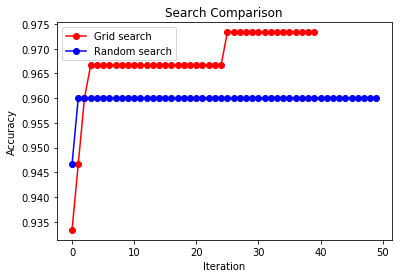

In [27]:
graphToCompare(gsp,rsp)

In [28]:
gsp = gridSearch(wine)
rsp = randSearch(wine)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/patrickward/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/patrickward/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/patrickward/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/patrickward/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Best Penalty w/ grid search: l1
Best C w/ grid search: 6
0.9943820224719101
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=1.668088018810296, penalty=l1 .................................
[CV]  C=1.668088018810296, penalty=l1, score=0.8333333333333334, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] C=1.668088018810296, penalty=l1 .................................
[CV] ...... C=1.668088018810296, penalty=l1, score=0.95, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] C=1.668088018810296, penalty=l1 .................................
[CV]  C=1.668088018810296, penalty=l1, score=0.9827586206896551, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] C=3.730229437354635, penalty=l2 .................................
[CV] ....... C=3.73022943735

[CV] ...... C=0.5615477543809351, penalty=l1, score=1.0, total=   0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.2s remaining:    0.0s
[CV] C=3.113556945346134, penalty=l2 .................................
[CV] ....... C=3.113556945346134, penalty=l2, score=0.9, total=   0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s remaining:    0.0s
[CV] C=3.113556945346134, penalty=l2 .................................
[CV] ...... C=3.113556945346134, penalty=l2, score=0.95, total=   0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.2s remaining:    0.0s
[CV] C=3.113556945346134, penalty=l2 .................................
[CV]  C=3.113556945346134, penalty=l2, score=0.9827586206896551, total=   0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.2s remaining:    0.0s
[CV] C=3.87304630287759, penalty=l2 ..................................
[CV] ........ C=3.87304630287759, penalty=l2, score=0.9, total=   0.0s
[Parallel(n_jobs=1)]: Done  43 ou

[CV] ..... C=1.9662926371213532, penalty=l2, score=0.95, total=   0.0s
[CV] C=1.9662926371213532, penalty=l2 ................................
[CV]  C=1.9662926371213532, penalty=l2, score=0.9827586206896551, total=   0.0s
[CV] C=2.2636481098567725, penalty=l2 ................................
[CV] ...... C=2.2636481098567725, penalty=l2, score=0.9, total=   0.0s
[CV] C=2.2636481098567725, penalty=l2 ................................
[CV] ..... C=2.2636481098567725, penalty=l2, score=0.95, total=   0.0s
[CV] C=2.2636481098567725, penalty=l2 ................................
[CV]  C=2.2636481098567725, penalty=l2, score=0.9827586206896551, total=   0.0s
[CV] C=0.5869142996232406, penalty=l1 ................................
[CV]  C=0.5869142996232406, penalty=l1, score=0.7833333333333333, total=   0.0s
[CV] C=0.5869142996232406, penalty=l1 ................................
[CV] ..... C=0.5869142996232406, penalty=l1, score=0.95, total=   0.0s
[CV] C=0.5869142996232406, penalty=l1 ............

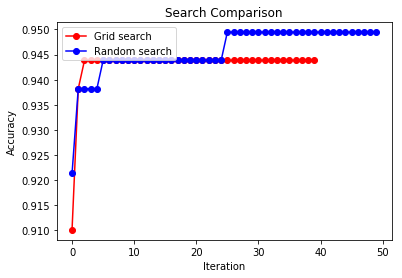

In [29]:
# Compare wine searches 
graphToCompare(gsp,rsp)

In [30]:
# create X label for features and y label for response
gsp = gridSearch(cancer)
rsp = randSearch(cancer)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   45.5s finished


Best Penalty w/ grid search: l1
Best C w/ grid search: 1
0.994991652754591
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=1.668088018810296, penalty=l1 .................................
[CV]  C=1.668088018810296, penalty=l1, score=0.9069767441860465, total=   0.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[CV] C=1.668088018810296, penalty=l1 .................................
[CV]  C=1.668088018810296, penalty=l1, score=0.9465776293823038, total=   0.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[CV] C=1.668088018810296, penalty=l1 .................................
[CV]  C=1.668088018810296, penalty=l1, score=0.9077181208053692, total=   0.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[CV] C=3.730229437354635, penalty=l2 .................................
[CV]  C=3.73022943735

[CV]  C=1.828819231947953, penalty=l2, score=0.9060402684563759, total=   0.1s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    8.0s remaining:    0.0s
[CV] C=0.5615477543809351, penalty=l1 ................................
[CV]  C=0.5615477543809351, penalty=l1, score=0.9136212624584718, total=   0.2s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    8.2s remaining:    0.0s
[CV] C=0.5615477543809351, penalty=l1 ................................
[CV]  C=0.5615477543809351, penalty=l1, score=0.9449081803005008, total=   0.2s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    8.4s remaining:    0.0s
[CV] C=0.5615477543809351, penalty=l1 ................................
[CV]  C=0.5615477543809351, penalty=l1, score=0.9194630872483222, total=   0.2s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    8.6s remaining:    0.0s
[CV] C=3.113556945346134, penalty=l2 .................................
[CV]  C=3.113556945346134, penalty=l2, score=0.8903654485049833, total=   0.2

[CV]  C=2.7460037107263346, penalty=l1, score=0.9036544850498339, total=   0.4s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   16.2s remaining:    0.0s
[CV] C=2.7460037107263346, penalty=l1 ................................
[CV]  C=2.7460037107263346, penalty=l1, score=0.9449081803005008, total=   0.6s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   16.8s remaining:    0.0s
[CV] C=2.7460037107263346, penalty=l1 ................................
[CV]  C=2.7460037107263346, penalty=l1, score=0.9060402684563759, total=   0.5s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   17.2s remaining:    0.0s
[CV] C=1.6501553660121044, penalty=l2 ................................
[CV]  C=1.6501553660121044, penalty=l2, score=0.8953488372093024, total=   0.1s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   17.3s remaining:    0.0s
[CV] C=1.6501553660121044, penalty=l2 ................................
[CV]  C=1.6501553660121044, penalty=l2, score=0.9482470784641068, total=   0

[CV]  C=2.2636481098567725, penalty=l2, score=0.9060402684563759, total=   0.1s
[CV] C=0.5869142996232406, penalty=l1 ................................
[CV]  C=0.5869142996232406, penalty=l1, score=0.915282392026578, total=   0.2s
[CV] C=0.5869142996232406, penalty=l1 ................................
[CV]  C=0.5869142996232406, penalty=l1, score=0.9449081803005008, total=   0.3s
[CV] C=0.5869142996232406, penalty=l1 ................................
[CV]  C=0.5869142996232406, penalty=l1, score=0.9194630872483222, total=   0.2s
[CV] C=1.0439159184622273, penalty=l1 ................................
[CV]  C=1.0439159184622273, penalty=l1, score=0.9003322259136213, total=   0.3s
[CV] C=1.0439159184622273, penalty=l1 ................................
[CV]  C=1.0439159184622273, penalty=l1, score=0.9432387312186978, total=   0.4s
[CV] C=1.0439159184622273, penalty=l1 ................................
[CV]  C=1.0439159184622273, penalty=l1, score=0.912751677852349, total=   0.3s
[CV] C=0.4093377

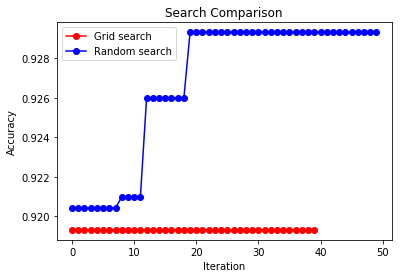

In [31]:
# create X label for features and y label for response
graphToCompare(gsp,rsp)

In [ ]:
# create X label for features and y label for response
learnAndPrintResultsLogsitic(iris)

In [ ]:
# create X label for features and y label for response
learnAndPrintResultsLogsitic(cancer)

In [ ]:
#K-Nearest Neighbour

In [ ]:
#import K neightbour form sklean and instantiate from sklearn
from sklearn.neighbors import KNeighborsClassifier

def learnAndPrintResultsKnn( dataSet ):
    knn = KNeighborsClassifier(n_neighbors=5)
    X = dataSet.data
    y = dataSet.target
    #Run Knn
    knn.fit(X, y)

    #Check preditions accuracy
    y_pred = knn.predict(X)
    print(metrics.accuracy_score(y, y_pred))



In [ ]:
learnAndPrintResultsKnn(iris)

In [ ]:
learnAndPrintResultsKnn(digits)

In [ ]:
learnAndPrintResultsKnn(wine)

In [ ]:
learnAndPrintResultsKnn(cancer)